In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [38]:
# 2023년 3월 기준 광주광역시 전기차 충전소 현황 파일 불러오기

charger23n_df = pd.read_excel('data/충전소+리스트_2023_03_27 광주전체.xlsx')


In [39]:
charger23n_df


,충전소명,운영기관,이용시간,연락처,주소,급속,완속
0,학동현대아파트(입주자 전용),에스에스차저,00:00~23:59,NaN,광주광역시 동구 증심천로89번길 16,0,1
1,용봉아이파크아파트(입주자 전용),에스에스차저,00:00~23:59,NaN,광주광역시 북구 비엔날레로82번길 41,0,1
2,기아 신시청지점,에스에스차저,00:00~23:59,NaN,광주광역시 서구 계수로51번길 4,0,2
3,현대자동차 학동대리점,에스에스차저,00:00~23:59,NaN,광주광역시 동구 남문로 576,1,0
4,수완피오레1단지입주자대표회의(입주민 전용),에스에스차저,00:00~23:59,NaN,광주광역시 광산구 풍영로170번길 39-25,0,3
...,...,...,...,...,...,...,...
730,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,1661-9408,광주광역시 광산구 하남대로 127-10,1,0
731,블루핸즈 신창진흥점,환경부,24시간 이용가능,1661-9408,광주광역시 광산구 북문대로 482,1,0
732,롯데마트 수완점,환경부,10:00~23:00,1661-9408,광주광역시 광산구 장신로 98,2,0
733,한국광기술원,환경부,24시간 이용가능,1661-9408,광주광역시 북구 첨단 벤처로 108번길 9,1,0


In [40]:
# 필요없는 연락처 컬럼 삭제

charger23n_df.drop(columns = ['연락처'], inplace = True)

In [41]:
charger23n_df

,충전소명,운영기관,이용시간,주소,급속,완속
0,학동현대아파트(입주자 전용),에스에스차저,00:00~23:59,광주광역시 동구 증심천로89번길 16,0,1
1,용봉아이파크아파트(입주자 전용),에스에스차저,00:00~23:59,광주광역시 북구 비엔날레로82번길 41,0,1
2,기아 신시청지점,에스에스차저,00:00~23:59,광주광역시 서구 계수로51번길 4,0,2
3,현대자동차 학동대리점,에스에스차저,00:00~23:59,광주광역시 동구 남문로 576,1,0
4,수완피오레1단지입주자대표회의(입주민 전용),에스에스차저,00:00~23:59,광주광역시 광산구 풍영로170번길 39-25,0,3
...,...,...,...,...,...,...
730,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
731,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
732,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0
733,한국광기술원,환경부,24시간 이용가능,광주광역시 북구 첨단 벤처로 108번길 9,1,0


In [42]:
# 데이터가 있는 한국전력, 환경부 설치 충전소만 가져오기

chargekepco_df = charger23n_df[charger23n_df['운영기관'].str.contains('한국전력', na = False)]

In [43]:
chargengv_df = charger23n_df[charger23n_df['운영기관'].str.contains('환경부', na = False)]

In [44]:
chargekepco_df

,충전소명,운영기관,이용시간,주소,급속,완속
301,광주전남직할(공용),한국전력,평일06시~23시(주말 24시간),"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",2,2
302,광산지사,한국전력,24시간,"광주광역시 광산구 소촌로 3 (소촌동, 한국전력공사)",2,0
303,하남2지구 중흥S-클래스,한국전력,24시간,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",1,2
304,수완모아엘가 아파트,한국전력,24시간,"광주광역시 광산구 수완로33번길 76 (수완동, 은빛마을 모아엘가)",0,2
305,EG스위트밸리3차 아파트,한국전력,24시간,"광주광역시 광산구 소촌로152번길 11 (소촌동, 스위트밸리3차아파트)",1,2
...,...,...,...,...,...,...
651,대주 아파트,한국전력,24시간,"광주광역시 북구 금호로40번길 11 (운암동, 운암동 대주APT)",1,1
652,제일풍경채에듀파크2차,한국전력,24시간,"광주광역시 남구 효우2로 48 (행암동, 근린생활시설)",1,2
653,제일풍경채에듀파크1단지,한국전력,24시간,"광주광역시 남구 효우로 332-10 (행암동, 제일풍경채에듀파크1단지)",0,2
654,봉선동제일풍경채엘리트파크,한국전력,24시간,"광주광역시 남구 제석로80번길 5 (봉선동, 제일풍경채 ELITE PARK)",1,0


In [45]:
chargengv_df

,충전소명,운영기관,이용시간,주소,급속,완속
136,광주디자인진흥원 야외주차장,환경부,08:00 ~ 22:00,광주광역시 북구 첨단과기로176번길 27,4,0
137,하남산단 근로자 공영주차장,환경부,24시간 이용가능,광주광역시 광산구 하남산단4번로 132,2,0
138,동구청사 주차장,환경부,24시간 이용가능,광주광역시 동구 백서로189번길 13,2,0
139,서구청사 의회동 부설주차장,환경부,24시간 이용가능,광주광역시 서구 경열로 33,2,0
140,광주북부경찰서,환경부,09:00 ~ 18:00,광주광역시 북구 서하로 172,2,0
...,...,...,...,...,...,...
729,기아자동차 진월점,환경부,24시간 이용가능,광주광역시 남구 진월동 314-1,1,0
730,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
731,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
732,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0


In [265]:
# chargengv_df.to_excel('chargengv_df.xlsx')

In [262]:
chargerkepngv_df = pd.concat([chargekepco_df,chargengv_df], ignore_index=True)

In [264]:
chargerkepngv_df

,충전소명,운영기관,이용시간,주소,급속,완속
0,광주전남직할(공용),한국전력,평일06시~23시(주말 24시간),"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",2,2
1,광산지사,한국전력,24시간,"광주광역시 광산구 소촌로 3 (소촌동, 한국전력공사)",2,0
2,하남2지구 중흥S-클래스,한국전력,24시간,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",1,2
3,수완모아엘가 아파트,한국전력,24시간,"광주광역시 광산구 수완로33번길 76 (수완동, 은빛마을 모아엘가)",0,2
4,EG스위트밸리3차 아파트,한국전력,24시간,"광주광역시 광산구 소촌로152번길 11 (소촌동, 스위트밸리3차아파트)",1,2
...,...,...,...,...,...,...
198,기아자동차 진월점,환경부,24시간 이용가능,광주광역시 남구 진월동 314-1,1,0
199,블루핸즈 하남현대자동차서비스,환경부,24시간 이용가능,광주광역시 광산구 하남대로 127-10,1,0
200,블루핸즈 신창진흥점,환경부,24시간 이용가능,광주광역시 광산구 북문대로 482,1,0
201,롯데마트 수완점,환경부,10:00~23:00,광주광역시 광산구 장신로 98,2,0


In [301]:
# 2023년도 현재 충전기 총 갯수 계산 (한국전력, 환경부 설치)

countchargerkepngv = chargerkepngv_df[['급속','완속']].sum()

In [302]:
countchargerkepngv

급속    244
완속    117
dtype: int64

In [310]:
countchargerkepngvs = countchargerkepngv.sum()

361

In [315]:
countchargerkepngvs

361

(array([0, 1]), [Text(0, 0, '급속'), Text(1, 0, '완속')])

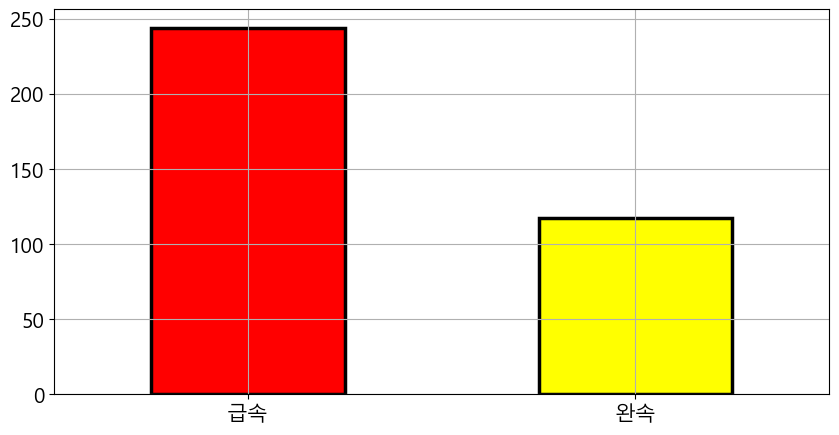

In [317]:
# 2023년도 현재 충전기 총 갯수 시각화
countchargerkepngv.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.xticks(rotation = 360)

In [314]:
# 2023년 현재 
np.round(countchargerkepngv.div(countchargerkepngvs), 2)

급속    0.68
완속    0.32
dtype: float64

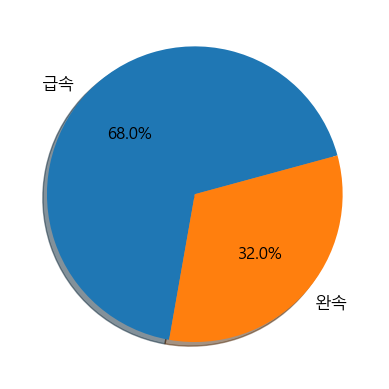

In [316]:
ratio = [68, 32]
labels = ['급속', '완속']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [47]:
# 20년도 상반기 한국전력공사 전기차충전소충전량(202001_202006).csv 파일 불러오기

charge2001_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202001_202006).csv', encoding = 'cp949')

In [48]:
ecargjgs_df = pd.read_csv('data/1. 전기차 등록대수(지자체)/광주광역시 광산구_전기차 등록현황(연도별)_20211231.csv', encoding = 'cp949')

ecargjn_df = pd.read_csv('data/1. 전기차 등록대수(지자체)/광주광역시 남구_전기차 등록대수_20220512.csv', encoding = 'cp949')

ecargjd_df = pd.read_csv('data/1. 전기차 등록대수(지자체)/광주광역시 동구_연도별전기차등록현황_20220411.csv', encoding = 'cp949')

ecargjb_df = pd.read_csv('data/1. 전기차 등록대수(지자체)/광주광역시 북구_연도별 전기차 등록 현황_20220402.csv', encoding = 'cp949')

ecargjs_df = pd.read_csv('data/1. 전기차 등록대수(지자체)/광주광역시 서구_전기차등록현황_20221231.csv', encoding = 'cp949')


In [49]:
# 광산구 전기차 등록대수 칼럼 정리

ecargjgs_df.drop(columns = ['연번','시도명','데이터기준일자'], inplace = True)

ecargjgs_df

,자치구명,연도,전기차 등록대수
0,광산구,2011,1
1,광산구,2012,1
2,광산구,2013,1
3,광산구,2014,22
4,광산구,2015,59
5,광산구,2016,73
6,광산구,2017,146
7,광산구,2018,351
8,광산구,2019,630
9,광산구,2020,846


In [50]:
# 남구 전기차 등록대수 칼럼 정리

ecargjn_df.drop(columns = ['연번','시도명','데이터기준일자'], inplace = True)

ecargjn_df

,자치구명,연도,전기차 등록대수
0,남구,2012,1
1,남구,2013,1
2,남구,2014,6
3,남구,2015,6
4,남구,2016,17
5,남구,2017,39
6,남구,2018,152
7,남구,2019,184
8,남구,2020,113
9,남구,2021,207


In [51]:
# 동구 전기차 등록대수 칼럼 정리

ecargjd_df.drop(columns = ['시도명','데이터기준일자'], inplace = True)



In [52]:
ecargjd_df.rename(columns={'전기차등록대수':'전기차 등록대수'})

,자치구명,연도,전기차 등록대수
0,동구,2015,13
1,동구,2016,10
2,동구,2017,29
3,동구,2018,93
4,동구,2019,199
5,동구,2020,263
6,동구,2021,384


In [53]:
# 북구 전기차 등록대수 칼럼 정리

ecargjb_df.drop(columns = ['시도명','데이터 기준일'], inplace = True)



In [54]:
ecargjb_df.rename(columns={'전기차 등록 대수(누계)':'전기차 등록대수'})


,자치구명,연도,전기차 등록대수
0,북구,2015,36
1,북구,2016,46
2,북구,2017,157
3,북구,2018,476
4,북구,2019,716
5,북구,2020,898
6,북구,2021,1529


In [55]:
ecargjs_df.sum(axis = 0)

차종       승용일반형 전기차승용다목적형 전기차승용기타형 전기차
2014년                              32
2015년                              36
2016년                              38
2017년                              60
2018년                             249
2019년                             533
2020년                             672
2021년                            1121
2022년                            1803
dtype: object

In [56]:
# data_sum = data_west.sum(axis=0)
# data_sum2 = data_sum1.drop([0])
# data_sum2.columns = ['연도','전기차등록대수']
# data_sum2['자치구'] = '서구

In [57]:
# ecargjs_df.sum([0],[1],[2])

In [58]:
# 20년도 상반기 한국전력공사 전기차충전소충전량 파일에서 필요없는 ['충전기ID'] 칼럼 제거

charge2001_df.drop(columns = ['충전기ID'], inplace = True)

In [59]:
charge2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.310,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.850,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.650,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
3,경기북부,경기북부직할,양주자이2단지 아파트,완속02,경기도 양주시 삼숭동 삼숭로38번길 78-12,완속,7.0,8.500,2,41,2020-01-01,2020-01-01 20:05:00,2020-01-01 22:46:00
4,인천,남인천,서창LH6단지,완속01,인천광역시 남동구 서창남순환로 190-100,완속,7.0,12.700,2,51,2020-01-01,2020-01-01 16:17:00,2020-01-01 19:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,환경부,환경부,청도새마을휴게소(대구방향),급속01,경상북도 청도군 청도읍 하지길 59-50,급속,NaN,14.530,0,19,2020-06-28,2020-06-28 16:46:00,2020-06-28 17:06:00
1048571,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,28.770,0,41,2020-06-28,2020-06-28 20:03:00,2020-06-28 20:45:00
1048572,경기,이천,이천휴게소(하남방향),급속01,경기도 이천시 신둔면 용면리 산 86,급속,50.0,15.017,0,29,2020-06-28,2020-06-28 20:20:00,2020-06-28 20:49:00
1048573,인천,영종,영종힐스테이트,완속03,인천광역시 중구 하늘별빛로 66,완속,7.0,10.500,3,49,2020-06-28,2020-06-28 17:00:00,2020-06-28 20:49:00


In [60]:
# 광주광역시 데이터 프레임 저장

chargegj2001_df = charge2001_df[charge2001_df['주소'].str.contains('광주광역시', na = False)]

In [61]:
chargegj2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00


In [62]:
# '구' 칼럼 생성을 위한 주소 분리

chargegj2001_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
2,광주광역시,남구,효우로,332-11,"(행암동,",효천2지구,중흥S-클래스,아파트),None,None
38,광주광역시,광산구,선운로20번길,47,"(선암동,",광주,선운지구,EG,the1,1단지)
41,광주광역시,광산구,목련로21번길,20,"(산정동,",하남2지구,중흥S-클래스),None,None,None
58,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
100,광주광역시,광산구,풍영로170번길,39-10,"(장덕동,",성덕마을,대방노블랜드3차),None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048447,광주광역시,광산구,임방울대로,261,"(신가동,",농수산물유통센터),None,None,None,None
1048495,광주광역시,남구,효천3로,110,"(임암동,",중흥,S-클래스,에코파크),None,None
1048524,광주광역시,광산구,목련로219번길,25,(운남동),None,None,None,None,None
1048550,광주광역시,광산구,비아중앙로31번길,6,"(비아동,",비아동,행정복지센터),None,None,None


In [63]:
# '구' 칼럼 생성

chargegj2001_df['구'] = chargegj2001_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\3766036850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargegj2001_df['구'] = chargegj2001_df['주소'].str.split(" ",expand=True)[1]


In [64]:
chargegj2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00,광산구


In [65]:
# chargegj2001_df
# 20년도 상반기 충전소 빈도수 확인
chargercount2001_df= chargegj2001_df[['구','충전소명' ,'주소', '충전기구분']]
acounts2001 = chargercount2001_df.groupby(["구", '충전소명','주소', "충전기구분"]).size()
pd.DataFrame(acounts2001).sort_values(by = ['주소'], ascending = False)

0
구   충전소명           주소                                       충전기구분     
서구  풍암호수공원 공영주차장   광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)     급속     819
    유니버시아드힐스테이트2단지 광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지) 급속      29
    유니버시아드힐스테이트1단지 광주광역시 서구 화운로 94 (화정동, 유니버시아드 힐스테이트 1단지)  급속     115
    광천e편한세상아파트     광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)         완속     550
                                                            급속     196
...                                                                ...
광산구 운남동 행정복지센터     광주광역시 광산구 목련로219번길 25 (운남동)              급속     499
    하남3모아엘가더퍼스트    광주광역시 광산구 단전둘레길 15 (하남동, 하남3지구모아엘가더퍼스트)  완속     231
    광산문화예술회관       광주광역시 광산구 광산로 68번길 13                    급속       9
    광산구청 구청사       광주광역시 광산구 광산로 29번길 15                    급속       7
    임곡동 주민센터       광주광역시 광산구 고봉로 788                        급속       1

[151 rows x 1 columns]

In [66]:
# 중복 값 없는 데이터를 위한 사전작업 (데이터 프레임 복사)
chargegj2001_df_copy = chargegj2001_df.copy()

In [67]:
# 20년도 상반기 전기차 충전소 가동 현황 (광주 자치구 기준, 한국전력, 환경부 설치)
chargegj2001_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00,광산구


In [68]:
# 구별 데이터 프레임 확보를 위한 새로운 데이터 프레임 생성

chargegj2001_diststat_df = chargegj2001_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [69]:
chargegj2001_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,광산구


In [70]:
# 중복된 데이터 제거

chargegj2001_diststat_df = chargegj2001_diststat_df.drop_duplicates()

In [71]:
chargegj2001_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
969646,환경부,환경부,광주망월주유소,급속01,광주광역시 북구 동문대로 603,급속,NaN,북구
972707,환경부,환경부,무등산생태탐방원,급속01,광주광역시 북구 충효동 805번지,급속,NaN,북구
1026180,환경부,환경부,동구다목적체육관 제1주차장,급속01,광주광역시 동구 남문로 418-15,급속,NaN,동구
1030045,환경부,환경부,광주교육과학연구원,급속01,광주광역시 동구 의재로 109번길 10,급속,NaN,동구


In [72]:
# 20년도 상반기 전기차 충전소 가동 현황(광주 자치구, 한국전력 설치 총계)

print(chargegj2001_diststat_df['구'].value_counts())

광산구    92
북구     51
서구     46
동구     23
남구     22
Name: 구, dtype: int64


In [73]:
# 20년도 상반기 전기차 충전소 가동 현황(광주광역시 기준, 한국전력. 환경부 설치 총계)

chargegj2001_diststat_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 2           남구
38         광산구
41         광산구
58          동구
100        광산구
          ... 
969646      북구
972707      북구
1026180     동구
1030045     동구
1030874     남구
Name: 구, Length: 234, dtype: object>

In [74]:
# 20년도 상반기 전기차 충전소 가동 비율(광주 자치구 기준, 한국전력, 환경부 설치)

np.round(chargegj2001_diststat_df['구'].value_counts().div(234), 2)

광산구    0.39
북구     0.22
서구     0.20
동구     0.10
남구     0.09
Name: 구, dtype: float64

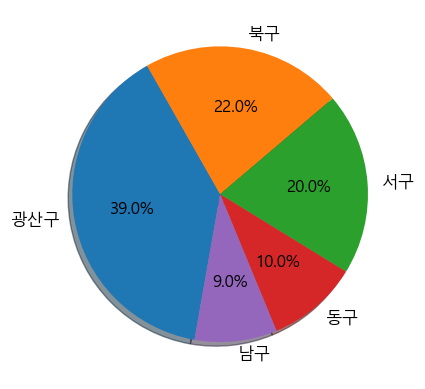

In [75]:
# 20년도 상반기 전기차 충전소 가동 비율 원형 그래프 시각화(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [39, 22, 20, 10, 9]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [76]:
chargegj2001_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
969646,환경부,환경부,광주망월주유소,급속01,광주광역시 북구 동문대로 603,급속,NaN,북구
972707,환경부,환경부,무등산생태탐방원,급속01,광주광역시 북구 충효동 805번지,급속,NaN,북구
1026180,환경부,환경부,동구다목적체육관 제1주차장,급속01,광주광역시 동구 남문로 418-15,급속,NaN,동구
1030045,환경부,환경부,광주교육과학연구원,급속01,광주광역시 동구 의재로 109번길 10,급속,NaN,동구


In [77]:
print(chargegj2001_diststat_df['충전기구분'].value_counts())

완속    125
급속    109
Name: 충전기구분, dtype: int64


<AxesSubplot:>

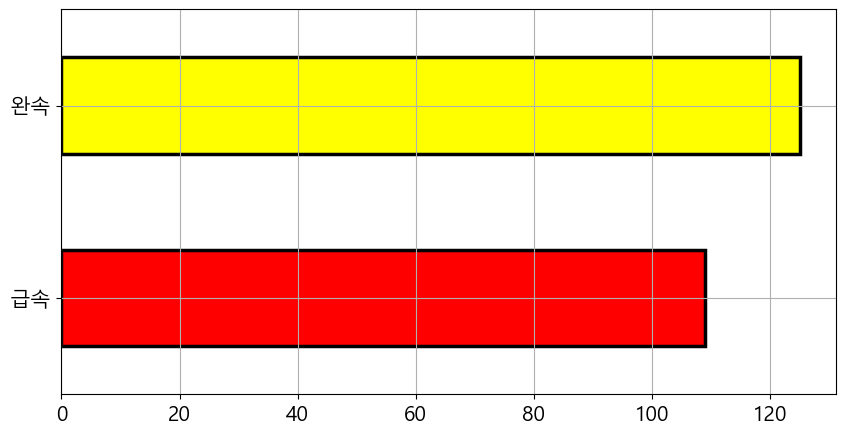

In [261]:
# 20년도 상반기 충전기 가동 현황 총합 시각화

chargergj2001dist = pd.value_counts(chargegj2001_diststat_df['충전기구분'].values, sort=True, ascending = True)
chargergj2001dist.plot.barh()
chargergj2001dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [245]:
# 20년도 상반기 충전기 가동 현황(급속, 완속, 구)

charger2001_df= chargegj2001_diststat_df[['충전기구분', '구']]
acountsch2001 = charger2001_df.groupby(["충전기구분", "구"]).size()
pd.DataFrame(acountsch2001)

0
충전기구분 구      
급속    광산구  40
      남구   11
      동구    9
      북구   23
      서구   26
완속    광산구  52
      남구   11
      동구   14
      북구   28
      서구   20

In [253]:
# 20년도 상반기 충전기 가동 현황(구, 급속, 완속)

charger2001d_df= chargegj2001_diststat_df[['구', '충전기구분']]
acounts2001d = charger2001_df.groupby(["구", "충전기구분"]).size() #, as_index= False).size()
pd.DataFrame(acounts2001d)

0
구   충전기구분    
광산구 급속     40
    완속     52
남구  급속     11
    완속     11
동구  급속      9
    완속     14
북구  급속     23
    완속     28
서구  급속     26
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

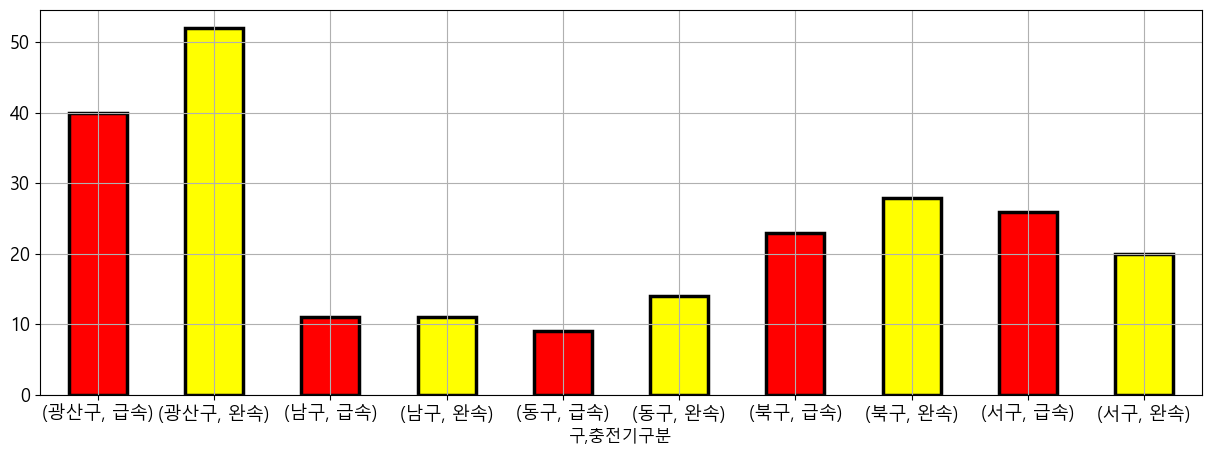

In [256]:
# 20년도 상반기 충전기 가동 현황 시각화 (구, 급속, 완속)

acounts2001d.plot.bar()
acounts2001d.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13) 
plt.xticks(rotation = 360)

In [81]:
chargegj2001_diststat_df['주소'].count()
chargegj2001_diststat_df['구'].count()

234

In [82]:
charger_df.sort_values(by = ['구','충전기구분'], ascending=True)

,구,충전기구분
343,광산구,급속
1105,광산구,급속
1319,광산구,급속
1479,광산구,급속
2402,광산구,급속
...,...,...
34978,서구,완속
39035,서구,완속
58151,서구,완속
60535,서구,완속


In [83]:
# 20년도 상반기 전기차 충전소 사용 현황(광주 자치구 기준, 한국전력, 환경부)

print(chargegj2001_df['구'].value_counts())

광산구    7842
서구     7640
북구     7488
동구     2902
남구     2167
Name: 구, dtype: int64


<AxesSubplot:>

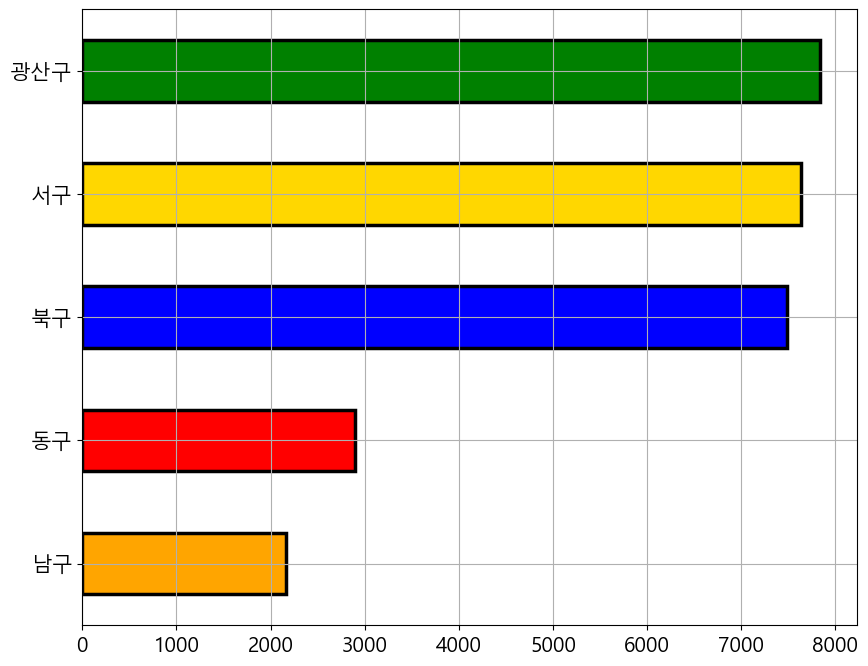

In [229]:
# 20년도 상반기 전기차 충전소 사용빈도 시각화

chargegj2001dist = pd.value_counts(chargegj2001_df['구'].values, sort=True, ascending = True)
chargegj2001dist.plot.barh()
chargegj2001dist.plot.barh(grid=True, color = ['orange', 'red', 'blue', 'gold', 'green'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)

In [85]:
# 20년도 하반기 한국전력공사 전기차충전소충전량(202007_202012).csv 파일 불러오기

charge2002_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202007_202012).csv', encoding = 'cp949')

In [86]:
# 20년도 하반기 한국전력공사 전기차충전소충전량(202007_202012).csv 필요없는 ['충전기ID'] 칼럼 제거

charge2002_df.drop(columns = ['충전기ID'], inplace = True)

In [87]:
charge2002_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,전북,군산,나운비사벌 아파트,완속02,"전라북도 군산시 하나운로 7 (나운동, 비사벌아파트)",완속,7.0,28.03,4,51,2020-07-01,2020-06-30 19:28:47,2020-07-01 00:20:04
1,경기,서용인,신정마을성지아파트,완속01,경기도 용인시 수지구 풍덕천동 정평로 61,완속,7.0,7.65,2,11,2020-07-01,2020-06-30 22:08:15,2020-07-01 00:20:04
2,경기,안양,휴먼시아청계마을4단지,급속01,경기도 의왕시 덕장로 76,급속,50.0,47.46,1,8,2020-07-01,2020-06-30 23:22:33,2020-07-01 00:31:01
3,전북,군산,금광베네스타,완속01,"전라북도 군산시 용둔길 12 (미룡동, 금광베네스타)",완속,7.0,29.04,4,50,2020-07-01,2020-06-30 19:40:43,2020-07-01 00:31:07
4,충북,충북직할,하복대벽산 아파트,완속01,충청북도 청주시 흥덕구 복대동 짐대로 6,완속,7.0,10.31,3,38,2020-07-01,2020-06-30 21:50:51,2020-07-01 01:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008058,경기,서수원,동탄신일유토빌,완속03,경기도 화성시 동탄반석로 232,완속,7.0,18.96,6,10,2020-12-03,2020-12-02 23:04:18,2020-12-03 05:14:56
1008059,인천,서인천,청라롯데캐슬 아파트,완속03,인천광역시 서구 청라커낼로 252,완속,7.0,37.80,5,44,2020-12-03,2020-12-02 23:31:25,2020-12-03 05:16:23
1008060,남서울,강남,타워팰리스G동,완속02,서울특별시 강남구 도곡동 언주로30길 26,완속,7.0,52.16,9,37,2020-12-03,2020-12-02 19:40:13,2020-12-03 05:17:23
1008061,대구,남대구,상인역e편한세상2단지 아파트,완속01,대구광역시 달서구 상인동 월서로3길 15,완속,7.0,39.77,6,22,2020-12-03,2020-12-02 23:02:31,2020-12-03 05:25:01


In [88]:
# 광주광역시 데이터 프레임 저장

chargegj2002_df = charge2002_df[charge2002_df['주소'].str.contains('광주광역시', na = False)]

In [89]:
chargegj2002_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37


In [90]:
# '구' 칼럼 생성을 위한 주소 분리

chargegj2002_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
64,광주광역시,서구,경열로,39,(농성동),None,None,None,None,None
80,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
112,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
162,광주광역시,서구,화개1로,78번길,8,None,None,None,None,None
183,광주광역시,북구,서하로94번길,10,"(용봉동,",쌍용예가),None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1007882,광주광역시,서구,상무버들로40번길,14,"(유촌동,",상무버들마을1주공아파트),None,None,None,None
1007896,광주광역시,서구,화운로,278,"(광천동,",광천,e편한세상),None,None,None
1007932,광주광역시,동구,의재로,123,"(운림동,",무등파크맨션),None,None,None,None
1007976,광주광역시,광산구,용아로,175,"(우산동,",국제미소래아파트),None,None,None,None


In [91]:
# '구' 칼럼 생성

chargegj2002_df['구'] = chargegj2002_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\470607942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargegj2002_df['구'] = chargegj2002_df['주소'].str.split(" ",expand=True)[1]


In [92]:
chargegj2002_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [93]:
# chargegj2001_df
# 20년도 하반기 충전소 빈도수 확인
chargercount2002_df= chargegj2002_df[['구','충전소명' ,'주소', '충전기구분']]
acounts2002 = chargercount2002_df.groupby(["구", '충전소명','주소', "충전기구분"]).size()
pd.DataFrame(acounts2002).sort_values(by = ['주소'], ascending = False)

0
구   충전소명           주소                                       충전기구분     
서구  풍암호수공원 공영주차장   광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)     급속     593
    유니버시아드힐스테이트2단지 광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지) 급속      61
    유니버시아드힐스테이트1단지 광주광역시 서구 화운로 94 (화정동, 유니버시아드 힐스테이트 1단지)  급속     115
    광천e편한세상아파트     광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)         급속     190
                                                            완속     556
...                                                                ...
광산구 운남동 행정복지센터     광주광역시 광산구 목련로219번길 25 (운남동)              급속     319
    하남3모아엘가더퍼스트    광주광역시 광산구 단전둘레길 15 (하남동, 하남3지구모아엘가더퍼스트)  완속     305
    광산문화예술회관       광주광역시 광산구 광산로 68번길 13                    급속       3
    광산구청 구청사       광주광역시 광산구 광산로 29번길 15                    급속       3
    임곡동 주민센터       광주광역시 광산구 고봉로 788                        급속       6

[159 rows x 1 columns]

In [94]:
# 엑셀로 저장해서 데이터 확인

In [95]:
# 중복 값 없는 데이터를 위한 사전작업 (데이터 프레임 복사)
chargegj2002_df_copy = chargegj2002_df.copy()

In [96]:
# 20년도 하반기 전기차 충전소 현황 (광주 자치구 기준, 한국전력, 환경부 설치)
chargegj2002_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [97]:
# 구별 데이터 프레임 확보를 위한 새로운 데이터 프레임 생성

chargegj2002_diststat_df = chargegj2002_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [98]:
chargegj2002_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,광산구


In [99]:
# 중복된 데이터 제거

chargegj2002_diststat_df = chargegj2002_diststat_df.drop_duplicates()

In [100]:
chargegj2002_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
896247,광주전남,광산,수완산이고운더테라스,완속01,"광주광역시 광산구 상완길 299 (수완동, 수완산이고운더테라스)",완속,7.0,광산구
896350,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
897092,광주전남,광산,수안채리치아파트,완속02,"광주광역시 광산구 임방울대로378번길 45 (수완동, 수안채리치)",완속,7.0,광산구
898608,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구


In [101]:
# 20년도 하반기 전기차 충전소 가동 현황(광주 자치구, 한국전력, 환경부 설치 총계)

print(chargegj2002_diststat_df['구'].value_counts())

광산구    99
북구     57
서구     45
동구     26
남구     24
Name: 구, dtype: int64


In [102]:
# 20년도 상반기 전기차 충전소 가동 현황(광주광역시 기준, 한국전력. 환경부 설치 총계)

chargegj2002_diststat_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 64         서구
80         북구
112        동구
162        서구
183        북구
         ... 
896247    광산구
896350     북구
897092    광산구
898608     북구
947807     남구
Name: 구, Length: 251, dtype: object>

In [103]:
# 20년도 하반기 전기차 충전소 가동 비율(광주 자치구 기준, 한국전력, 환경부 설치)

np.round(chargegj2002_diststat_df['구'].value_counts().div(251), 2)

광산구    0.39
북구     0.23
서구     0.18
동구     0.10
남구     0.10
Name: 구, dtype: float64

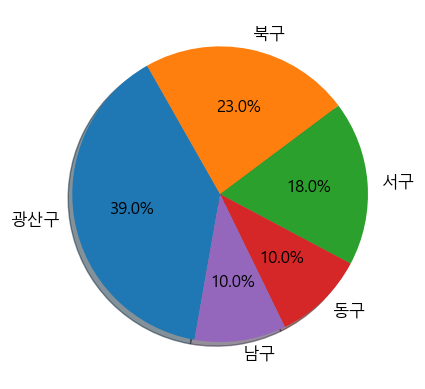

In [104]:
# 20년도 하반기 전기차 충전소 가동 비율 원형 그래프 시각화(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [39, 23, 18, 10, 10]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [105]:
chargegj2002_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
896247,광주전남,광산,수완산이고운더테라스,완속01,"광주광역시 광산구 상완길 299 (수완동, 수완산이고운더테라스)",완속,7.0,광산구
896350,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
897092,광주전남,광산,수안채리치아파트,완속02,"광주광역시 광산구 임방울대로378번길 45 (수완동, 수안채리치)",완속,7.0,광산구
898608,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구


In [106]:
print(chargegj2002_diststat_df['충전기구분'].value_counts())

완속    130
급속    121
Name: 충전기구분, dtype: int64


<AxesSubplot:>

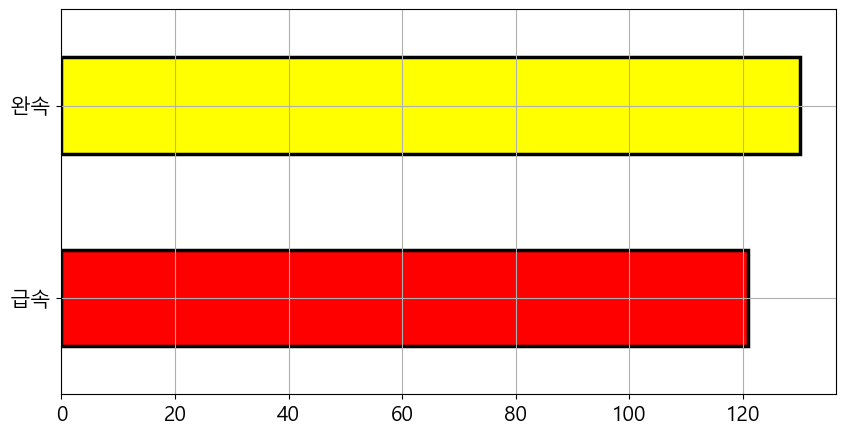

In [277]:
# 20년도 하반기 충전기 가동 현황 총합 (완속, 급속)

chargergj2002dist = pd.value_counts(chargegj2002_diststat_df['충전기구분'].values, sort=True, ascending = True)
chargergj2002dist.plot.barh()
chargergj2002dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [108]:
charger2002_df= chargegj2002_diststat_df[['충전기구분', '구']]
acountsch2002 = charger2002_df.groupby(["충전기구분", "구"]).size()
pd.DataFrame(acountsch2002)

0
충전기구분 구      
급속    광산구  42
      남구   13
      동구   12
      북구   29
      서구   25
완속    광산구  57
      남구   11
      동구   14
      북구   28
      서구   20

In [268]:
# 20년도 하반기 충전기 가동 현황 (구, 급속, 완속)

charger2002_df= chargegj2002_diststat_df[['구', '충전기구분']]
acountsch2002d = charger2002_df.groupby(["구", "충전기구분"]).size() #, as_index= False).size()
pd.DataFrame(acountsch2002d)

0
구   충전기구분    
광산구 급속     42
    완속     57
남구  급속     13
    완속     11
동구  급속     12
    완속     14
북구  급속     29
    완속     28
서구  급속     25
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

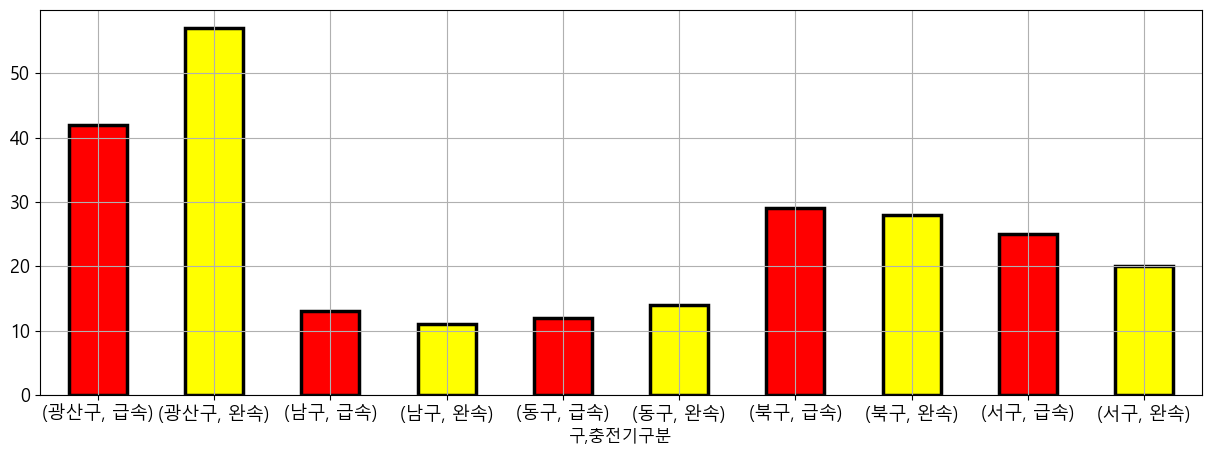

In [270]:
# 20년도 하반기 충전기 가동 현황 시각화(구, 급속, 완속)

acountsch2002d.plot.bar()
acountsch2002d.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [110]:
chargegj2002_diststat_df['주소'].count()
chargegj2002_diststat_df['구'].count()

251

In [111]:
charger2002_df.sort_values(by = ['구','충전기구분'], ascending=True)

,구,충전기구분
1051,광산구,급속
1055,광산구,급속
1530,광산구,급속
1563,광산구,급속
2245,광산구,급속
...,...,...
13745,서구,완속
16407,서구,완속
22979,서구,완속
109410,서구,완속


In [112]:
# 20년도 하반기 전기차 충전소 가동 현황(광주 자치구 기준, 한국전력, 환경부)

print(chargegj2002_df['구'].value_counts())

북구     9290
서구     8491
광산구    6950
동구     2549
남구     1953
Name: 구, dtype: int64


<AxesSubplot:>

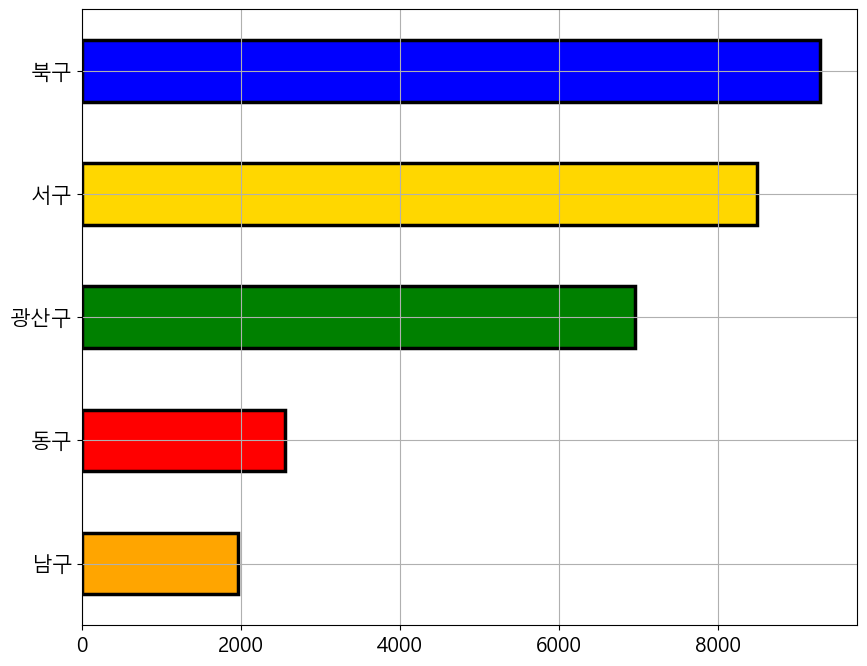

In [228]:
# 20년도 하반기 전기차 충전소 사용빈도 시각화

chargegj2002dist = pd.value_counts(chargegj2002_df['구'].values, sort=True, ascending = True)
chargegj2002dist.plot.barh()
chargegj2002dist.plot.barh(grid=True, color = ['orange', 'red', 'green', 'gold', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)

In [114]:
# 21년도 상반기 한국전력공사 전기차충전소충전량 파일 불러오기

charge2101_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202101_202106).csv', encoding = 'cp949')

In [115]:
# 21년도 상반기 한국전력공사 전기차충전소충전량 퍄일에서 필요없는 ['충전기ID'] 칼럼 제거

charge2101_df.drop(columns = ['충전기ID'], inplace = True)

In [116]:
charge2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,인천,김포,운양동 전원마을월드2단지,급속01,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44
1,인천,시흥,LH퍼스트리움 아파트,완속03,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38
2,남서울,강남,LH강남힐스테이트,급속01,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33
3,강원,강릉,알펜시아리조트,급속02,강원도 평창군 대관령면 솔봉로 325,급속,50.0,39.12,0,53,2021-01-01,2021-01-01 16:12:09,2021-01-01 17:05:27
4,대전세종충남,서대전,대전시립연정국악원 주차장,급속02,대전광역시 서구 둔산대로 181,급속,50.0,30.42,0,42,2021-01-01,2021-01-01 23:14:50,2021-01-01 23:57:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,서울,광진성동,금호자이1차,완속01,서울특별시 성동구 금호동2가 금호로 117,완속,7.0,0.64,0,11,2021-05-15,2021-05-15 18:09:05,2021-05-15 18:20:05
1048571,제주,제주직할,제주정든마을1단지LH 아파트,완속03,제주특별자치도 제주시 노형동 정존11길 54,완속,7.0,15.15,2,19,2021-05-15,2021-05-15 16:00:44,2021-05-15 18:20:07
1048572,제주,제주직할,제주공항,급속03,제주특별자치도 제주시 용담2동 1950-5,급속,50.0,5.72,0,16,2021-05-15,2021-05-15 18:04:10,2021-05-15 18:20:51
1048573,서울,마포용산,마포한강2차 푸르지오아파트,완속01,"서울특별시 마포구 월드컵로3길 14 (합정동, 마포 한강 2차 푸르지오)",완속,7.0,14.88,2,49,2021-05-15,2021-05-15 15:09:00,2021-05-15 17:58:11


In [117]:
# 광주광역시 데이터 프레임 저장

chargegj2101_df = charge2101_df[charge2101_df['주소'].str.contains('광주광역시', na = False)]

In [118]:
chargegj2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53


In [119]:
# '구' 칼럼 생성을 위한 주소 분리

chargegj2101_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
63,광주광역시,광산구,수완로33번길,22,"(수완동,",수완1차우미린아파트),None,None,None,None
80,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
81,광주광역시,남구,서문대로824번길,10,"(주월동,",(구)광주보훈병원),None,None,None,None
84,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
94,광주광역시,북구,설죽로,595,"(일곡동,",롯데아파트),None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048324,광주광역시,서구,상무버들로40번길,14,"(유촌동,",상무버들마을1주공아파트),None,None,None,None
1048332,광주광역시,광산구,풍영로329번길,19,"(장덕동,",수완지구,호반베르디움,2차아파트),None,None
1048365,광주광역시,광산구,월전로,67,(월전동),None,None,None,None,None
1048478,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None


In [120]:
# '구' 칼럼 생성

chargegj2101_df['구'] = chargegj2101_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\3437198358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargegj2101_df['구'] = chargegj2101_df['주소'].str.split(" ",expand=True)[1]


In [121]:
chargegj2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53,서구


In [122]:
# chargegj2001_df
# 21년도 상반기 충전소 빈도수 확인
chargercount2101_df= chargegj2101_df[['구','충전소명' ,'주소', '충전기구분']]
acounts2101 = chargercount2101_df.groupby(["구", '충전소명','주소', "충전기구분"]).size()
pd.DataFrame(acounts2101).sort_values(by = ['주소'], ascending = False)

0
구   충전소명           주소                                       충전기구분     
서구  풍암호수공원 공영주차장   광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)     급속     427
    광주시청자미디어센터     광주광역시 서구 회재로 905 (금호동, 시청자미디어센터)         급속      37
    농성2동주민센타       광주광역시 서구 화정로 314                         급속       4
    유니버시아드힐스테이트2단지 광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지) 급속      51
    유니버시아드힐스테이트1단지 광주광역시 서구 화운로 94 (화정동, 유니버시아드 힐스테이트 1단지)  급속     120
...                                                                ...
광산구 운남동 행정복지센터     광주광역시 광산구 목련로219번길 25 (운남동)              급속     276
    동곡동행정복지센터      광주광역시 광산구 동곡로 151-56(하산동)                급속       1
    하남3모아엘가더퍼스트    광주광역시 광산구 단전둘레길 15 (하남동, 하남3지구모아엘가더퍼스트)  완속     274
    광산구청 구청사       광주광역시 광산구 광산로 29번길 15                    급속       3
    임곡동 주민센터       광주광역시 광산구 고봉로 788                        급속       8

[174 rows x 1 columns]

In [123]:
# 엑셀로 저장해서 데이터 확인

In [124]:
# 중복 값 없는 데이터를 위한 사전작업 (데이터 프레임 복사)
chargegj2101_df_copy = chargegj2101_df.copy()

In [125]:
# 21년도 상반기 전기차 충전소 가동 현황 (광주 자치구 기준, 한국전력, 환경부 설치)
chargegj2101_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53,서구


In [126]:
# 구별 데이터 프레임 확보를 위한 새로운 데이터 프레임 생성

chargegj2101_diststat_df = chargegj2101_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [127]:
chargegj2101_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구


In [128]:
# 중복된 데이터 제거

chargegj2101_diststat_df = chargegj2101_diststat_df.drop_duplicates()

In [129]:
chargegj2101_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
960614,환경부,환경부,롯데마트 수완점,급속01,광주광역시 광산구 장신로 98,급속,NaN,광산구
982760,환경부,환경부,삼도동주민센터,급속01,광주광역시 광산구 오운로 433-1,급속,NaN,광산구
991069,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구
991120,환경부,환경부,국가정보자원관리원 광주센터,급속02,광주광역시 서구 송암로 143번길 34,급속,NaN,서구


In [130]:
# 21년도 상반기 전기차 충전소 가동 현황(광주 자치구, 한국전력, 환경부 설치 총계)

print(chargegj2101_diststat_df['구'].value_counts())

광산구    105
북구      70
서구      51
남구      29
동구      26
Name: 구, dtype: int64


In [131]:
# 21년도 상반기 전기차 충전소 가동 현황 합계(광주광역시 기준, 한국전력. 환경부 설치 총계)

chargegj2101_diststat_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 63         광산구
80          북구
81          남구
84          북구
94          북구
          ... 
960614     광산구
982760     광산구
991069      서구
991120      서구
1041265     서구
Name: 구, Length: 281, dtype: object>

In [132]:
# 21년도 상반기 전기차 충전소 가동 비율(광주 자치구 기준, 한국전력, 환경부 설치)

np.round(chargegj2101_diststat_df['구'].value_counts().div(281), 2)

광산구    0.37
북구     0.25
서구     0.18
남구     0.10
동구     0.09
Name: 구, dtype: float64

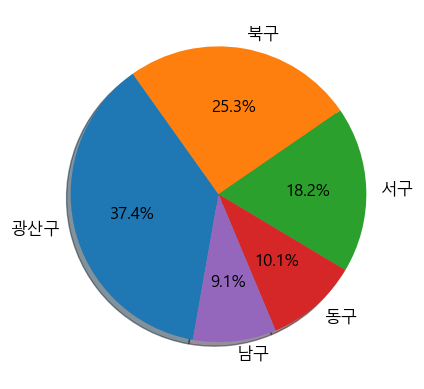

In [133]:
# 21년도 상반기 전기차 충전소 가동 비율 원형 그래프 시각화(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [37, 25, 18, 10, 9]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [134]:
chargegj2101_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
960614,환경부,환경부,롯데마트 수완점,급속01,광주광역시 광산구 장신로 98,급속,NaN,광산구
982760,환경부,환경부,삼도동주민센터,급속01,광주광역시 광산구 오운로 433-1,급속,NaN,광산구
991069,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구
991120,환경부,환경부,국가정보자원관리원 광주센터,급속02,광주광역시 서구 송암로 143번길 34,급속,NaN,서구


In [135]:
print(chargegj2101_diststat_df['충전기구분'].value_counts())

급속    149
완속    132
Name: 충전기구분, dtype: int64


<AxesSubplot:>

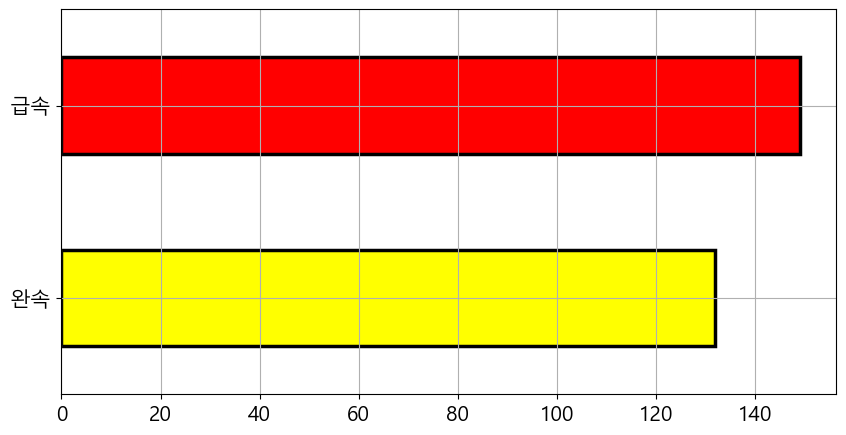

In [218]:
# 21년도 상반기 충전기 가동 총합(급속, 완속) 

chargergj2101dist = pd.value_counts(chargegj2101_diststat_df['충전기구분'].values, sort=True, ascending = True)
chargergj2101dist.plot.barh()
chargergj2101dist.plot.barh(grid=True,color = ['yellow', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [137]:
# 21년도 상반기 충전기 가동 현황(급속, 완속, 구)

charger2101_df= chargegj2101_diststat_df[['충전기구분', '구']]
acountsch2101 = charger2101_df.groupby(["충전기구분", "구"]).size()
pd.DataFrame(acountsch2101)

0
충전기구분 구      
급속    광산구  46
      남구   18
      동구   12
      북구   42
      서구   31
완속    광산구  59
      남구   11
      동구   14
      북구   28
      서구   20

In [271]:
# 21년도 상반기 충전기 가동 현황 (구, 급속, 완속)

charger2101_df= chargegj2101_diststat_df[['구', '충전기구분']]
acountsch2101d = charger2101_df.groupby(["구", "충전기구분"]).size() #, as_index= False).size()
pd.DataFrame(acountsch2101d)

0
구   충전기구분    
광산구 급속     46
    완속     59
남구  급속     18
    완속     11
동구  급속     12
    완속     14
북구  급속     42
    완속     28
서구  급속     31
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

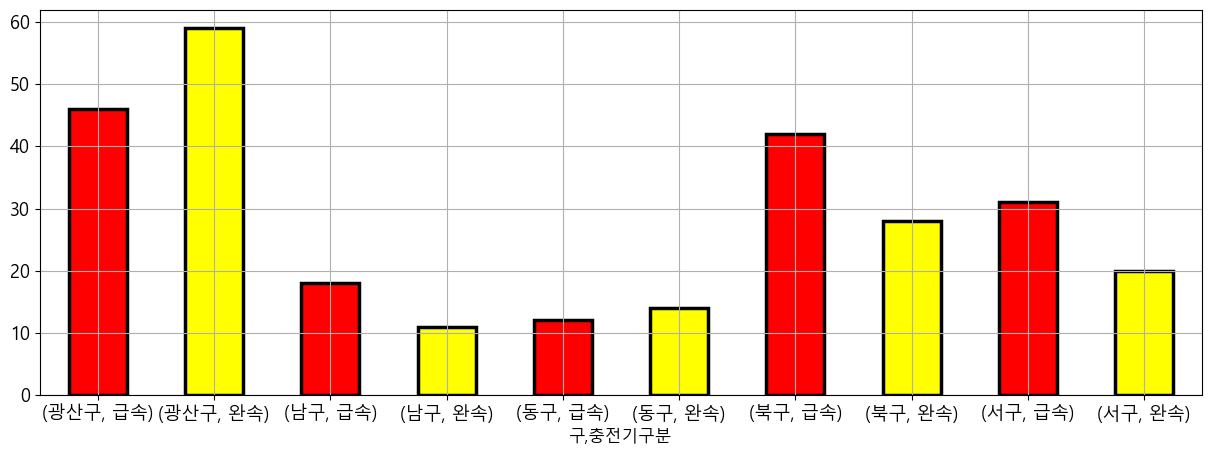

In [272]:
# 21년도 상반기 충전기 가동 현황 시각화

acountsch2101d.plot.bar()
acountsch2101d.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [139]:
chargegj2101_diststat_df['주소'].count()
chargegj2101_diststat_df['구'].count()

281

In [140]:
charger2101_df.sort_values(by = ['구','충전기구분'], ascending=True)

,구,충전기구분
223,광산구,급속
300,광산구,급속
1056,광산구,급속
1289,광산구,급속
1682,광산구,급속
...,...,...
28652,서구,완속
51526,서구,완속
58301,서구,완속
91370,서구,완속


In [141]:
# 21년도 상반기 전기차 충전소 사용현황(광주 자치구 기준, 한국전력, 환경부)

print(chargegj2101_df['구'].value_counts())

북구     16923
광산구     8978
서구      7954
동구      4244
남구      2366
Name: 구, dtype: int64


<AxesSubplot:>

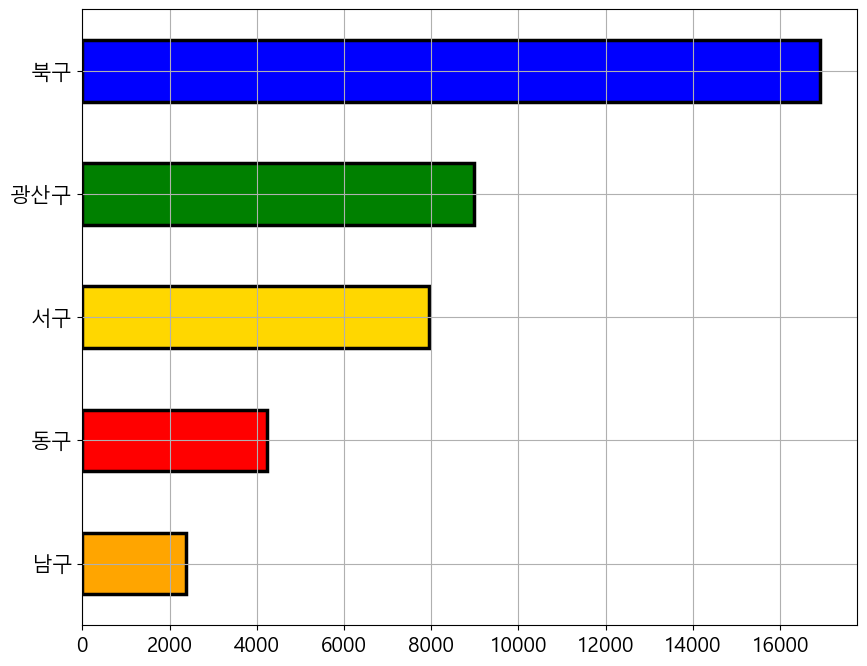

In [227]:
# 21년도 상반기 전기차 충전소 사용빈도 시각화

chargegj2101dist = pd.value_counts(chargegj2101_df['구'].values, sort=True, ascending = True)
chargegj2101dist.plot.barh()
chargegj2101dist.plot.barh(grid=True, color = ['orange', 'red', 'gold', 'green', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)

In [143]:
# 21년도 하반기 한국전력공사 전기차충전소충전량 파일 불러오기

charge2102_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202107_202112).csv', encoding = 'cp949')

In [144]:
# 21년도 하반기 한국전력공사 전기차충전소충전량(202007_202012).csv 필요없는 ['충전기ID'] 칼럼 제거

charge2102_df.drop(columns = ['충전기ID'], inplace = True)

In [145]:
charge2102_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,강원,강원직할,강원직할,완속05,강원도 춘천시 수풍골길 7,완속,7.0,13.17,2,39,2021-07-01,2021-07-01 19:35:55,2021-07-01 22:15:42
1,남서울,남서울직할,남서울직할,급속01,서울특별시 영등포구 여의도동 21,급속,50.0,15.84,0,24,2021-07-01,2021-07-01 14:30:46,2021-07-01 14:54:51
2,남서울,남서울직할,남서울직할,급속01,서울특별시 영등포구 여의도동 21,급속,50.0,11.70,0,43,2021-07-01,2021-07-01 16:52:38,2021-07-01 17:36:36
3,강원,강원직할,강원직할,완속02,강원도 춘천시 수풍골길 7,완속,7.0,5.40,1,23,2021-07-01,2021-07-01 10:58:58,2021-07-01 12:22:29
4,강원,강원직할,강원직할,완속02,강원도 춘천시 수풍골길 7,완속,7.0,5.53,2,11,2021-07-01,2021-07-01 16:46:25,2021-07-01 18:58:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,인천,부천,행복한마을 서해아파트,완속02,"경기도 부천시 상동로 57 (상동, 행복한마을 서해그랑블)",완속,7.0,9.59,2,4,2021-10-17,2021-10-17 18:37:16,2021-10-17 20:41:57
1048571,제주,서귀포,서귀포지사,급속02,제주특별자치도 서귀포시 신중로 56,급속,50.0,67.99,2,18,2021-10-17,2021-10-17 18:24:50,2021-10-17 20:43:29
1048572,경기북부,고양,홈플러스 고양터미널점,급속01,경기도 고양시 일산동구 중앙로 1036,급속,50.0,0.17,0,1,2021-10-17,2021-10-17 13:25:21,2021-10-17 13:26:55
1048573,강원,강원직할,롯데캐슬 스카이클래스,완속03,강원도 춘천시 방송길 70,완속,7.0,5.90,1,47,2021-10-17,2021-10-17 11:38:47,2021-10-17 13:26:19


In [146]:
# 광주광역시 데이터 프레임 저장

chargegj2102_df = charge2102_df[charge2102_df['주소'].str.contains('광주광역시', na = False)]

In [147]:
chargegj2102_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10


In [148]:
# '구' 칼럼 생성을 위한 주소 분리

chargegj2102_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
25,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
85,광주광역시,광산구,첨단중앙로68번길,100,"(산월동,",첨단3-2차,호반리젠시빌),None,None,None
175,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
176,광주광역시,광산구,풍영로170번길,39-10,"(장덕동,",성덕마을,대방노블랜드3차),None,None,None
220,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048451,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None
1048453,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
1048456,광주광역시,광산구,장덕로,158,"(수완동,",수완동행정복지센터/수완보건지소),None,None,None,None
1048493,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None


In [149]:
# '구' 칼럼 생성

chargegj2102_df['구'] = chargegj2102_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\903417191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargegj2102_df['구'] = chargegj2102_df['주소'].str.split(" ",expand=True)[1]


In [150]:
chargegj2102_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,서구


In [151]:
# 21년도 하반기 충전소 빈도수 확인
chargercount2102_df= chargegj2102_df[['구','충전소명' ,'주소', '충전기구분']]
acounts2102 = chargercount2102_df.groupby(["구", '충전소명','주소', "충전기구분"]).size()
pd.DataFrame(acounts2102).sort_values(by = ['주소'], ascending = False)

0
구   충전소명           주소                                       충전기구분     
서구  풍암호수공원 공영주차장   광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)     급속     514
    광주시청자미디어센터     광주광역시 서구 회재로 905 (금호동, 시청자미디어센터)         급속      40
    유니버시아드힐스테이트2단지 광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지) 급속      62
    유니버시아드힐스테이트1단지 광주광역시 서구 화운로 94 (화정동, 유니버시아드 힐스테이트 1단지)  급속     132
    광천e편한세상아파트     광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)         완속     398
...                                                                ...
광산구 하남3모아엘가더퍼스트    광주광역시 광산구 단전둘레길 15 (하남동, 하남3지구모아엘가더퍼스트)  완속     314
    본량동행정복지센터      광주광역시 광산구 남산동 698-20                     급속       1
    광산문화예술회관       광주광역시 광산구 광산로 68번길 13                    급속       1
    광산구청 구청사       광주광역시 광산구 광산로 29번길 15                    급속       7
    임곡동 주민센터       광주광역시 광산구 고봉로 788                        급속       6

[184 rows x 1 columns]

In [152]:
# 엑셀로 저장해서 데이터 확인

In [153]:
# 중복 값 없는 데이터를 위한 사전작업 (데이터 프레임 복사)
chargegj2102_df_copy = chargegj2102_df.copy()

In [154]:
# 21년도 하반기 전기차 충전소 가동 현황 (광주 자치구 기준, 한국전력, 환경부 설치)
chargegj2102_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,서구


In [155]:
# 구별 데이터 프레임 확보를 위한 새로운 데이터 프레임 생성

chargegj2102_diststat_df = chargegj2102_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [156]:
chargegj2102_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구


In [157]:
# 중복된 데이터 제거

chargegj2102_diststat_df = chargegj2102_diststat_df.drop_duplicates()

In [158]:
chargegj2102_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
251,광주전남,광산,도산버스차고지,급속03,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,광산구
...,...,...,...,...,...,...,...,...
839632,환경부,환경부,효덕동공영주차장,급속01,광주광역시 남구 진월동 330-49,급속,NaN,남구
848101,환경부,환경부,증심사주차장,급속01,광주광역시 동구 의재로 216,급속,NaN,동구
929567,환경부,환경부,서석동 공영주차장,급속01,광주광역시 동구 서석동 24-2,급속,NaN,동구
958110,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구


In [159]:
# 21년도 하반기 전기차 충전소 가동 현황(광주 자치구, 한국전력, 환경부 설치 총계)

print(chargegj2102_diststat_df['구'].value_counts())

광산구    112
북구      76
서구      54
남구      31
동구      29
Name: 구, dtype: int64


In [160]:
# 21년도 하반기 전기차 충전소 가동 현황(광주광역시 기준, 한국전력. 환경부 설치 총계)

chargegj2102_diststat_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 25         동구
85        광산구
175        북구
176       광산구
251       광산구
         ... 
839632     남구
848101     동구
929567     동구
958110     서구
971009     서구
Name: 구, Length: 302, dtype: object>

In [161]:
# 21년도 하반기 전기차 충전소 설치 비율(광주 자치구 기준, 한국전력, 환경부 설치)

np.round(chargegj2102_diststat_df['구'].value_counts().div(302), 2)

광산구    0.37
북구     0.25
서구     0.18
남구     0.10
동구     0.10
Name: 구, dtype: float64

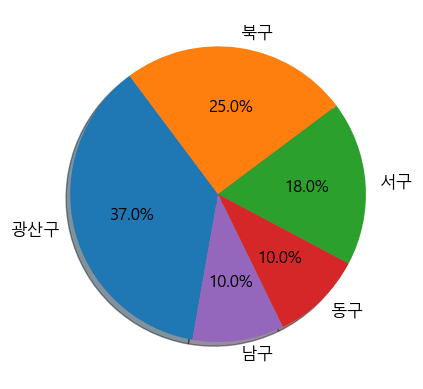

In [162]:
# 21년도 하반기 전기차 충전소 설치 비율 원형 그래프 시각화(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [37, 25, 18, 10, 10]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [163]:
chargegj2102_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
251,광주전남,광산,도산버스차고지,급속03,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,광산구
...,...,...,...,...,...,...,...,...
839632,환경부,환경부,효덕동공영주차장,급속01,광주광역시 남구 진월동 330-49,급속,NaN,남구
848101,환경부,환경부,증심사주차장,급속01,광주광역시 동구 의재로 216,급속,NaN,동구
929567,환경부,환경부,서석동 공영주차장,급속01,광주광역시 동구 서석동 24-2,급속,NaN,동구
958110,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구


In [164]:
print(chargegj2102_diststat_df['충전기구분'].value_counts())

급속    173
완속    129
Name: 충전기구분, dtype: int64


<AxesSubplot:>

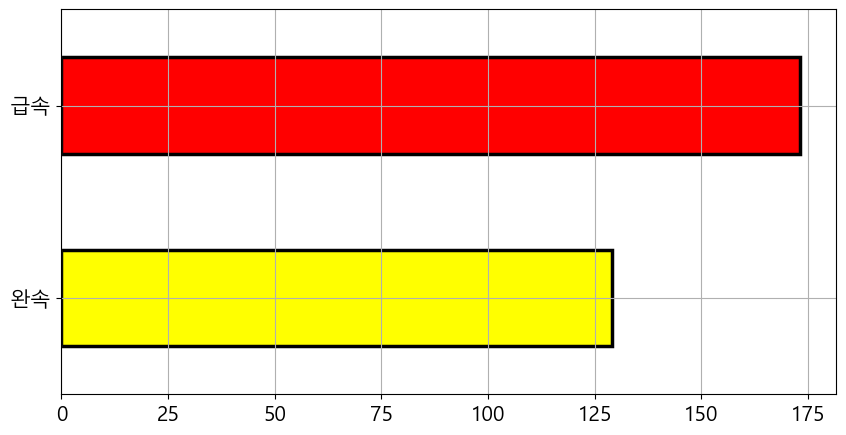

In [217]:
# 21년도 하반기 가동 충전기 총합(급속, 완속)

chargergj2102dist = pd.value_counts(chargegj2102_diststat_df['충전기구분'].values, sort=True, ascending = True)
chargergj2102dist.plot.barh()
chargergj2102dist.plot.barh(grid=True, color = ['yellow', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [166]:
# 21년도 하반기 충전기 가동 현황(급속, 완속, 구)

charger2102_df= chargegj2102_diststat_df[['충전기구분', '구']]
acountsch2102 = charger2102_df.groupby(["충전기구분", "구"]).size()
pd.DataFrame(acountsch2102)

0
충전기구분 구      
급속    광산구  55
      남구   20
      동구   15
      북구   48
      서구   35
완속    광산구  57
      남구   11
      동구   14
      북구   28
      서구   19

In [273]:
# 21년도 하반기 충전기 가동 현황(구, 급속, 완속)

charger2102_df= chargegj2102_diststat_df[['구', '충전기구분']]
acountsch2102d = charger2102_df.groupby(["구", "충전기구분"]).size() #, as_index= False).size()
pd.DataFrame(acountsch2102d)

0
구   충전기구분    
광산구 급속     55
    완속     57
남구  급속     20
    완속     11
동구  급속     15
    완속     14
북구  급속     48
    완속     28
서구  급속     35
    완속     19

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

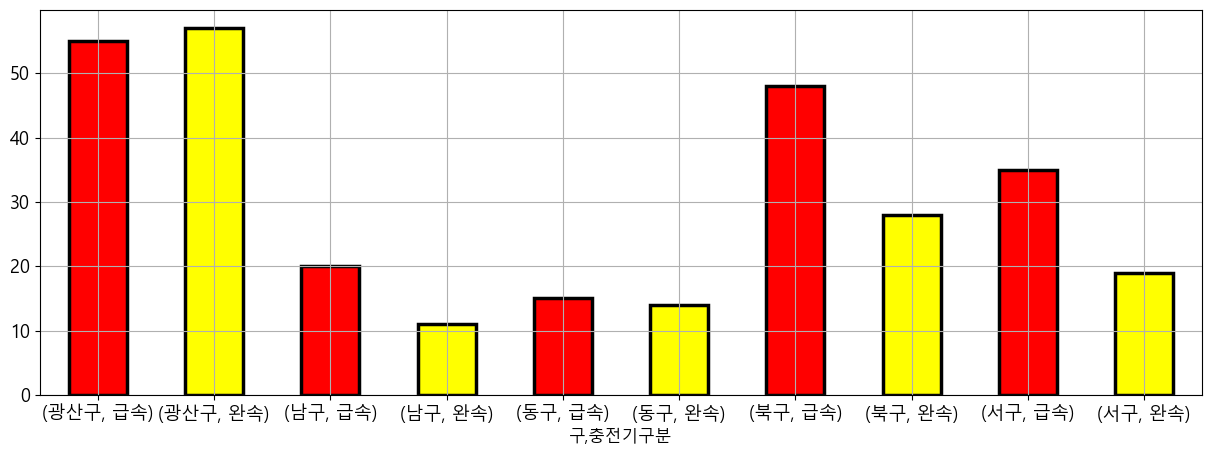

In [274]:
# 21년도 하반기 가동 충전기 현황 시각화

acountsch2102d.plot.bar()
acountsch2102d.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [168]:
chargegj2102_diststat_df['주소'].count()
chargegj2102_diststat_df['구'].count()

302

In [169]:
charger2102_df.sort_values(by = ['구','충전기구분'], ascending=True)

,구,충전기구분
85,광산구,급속
251,광산구,급속
319,광산구,급속
625,광산구,급속
635,광산구,급속
...,...,...
14316,서구,완속
15493,서구,완속
18952,서구,완속
32176,서구,완속


In [170]:
# 21년도 하반기 전기차 충전소 사용현황(광주 자치구 기준, 한국전력, 환경부)

print(chargegj2102_df['구'].value_counts())

북구     16134
광산구     9576
서구      7164
동구      3340
남구      1982
Name: 구, dtype: int64


<AxesSubplot:>

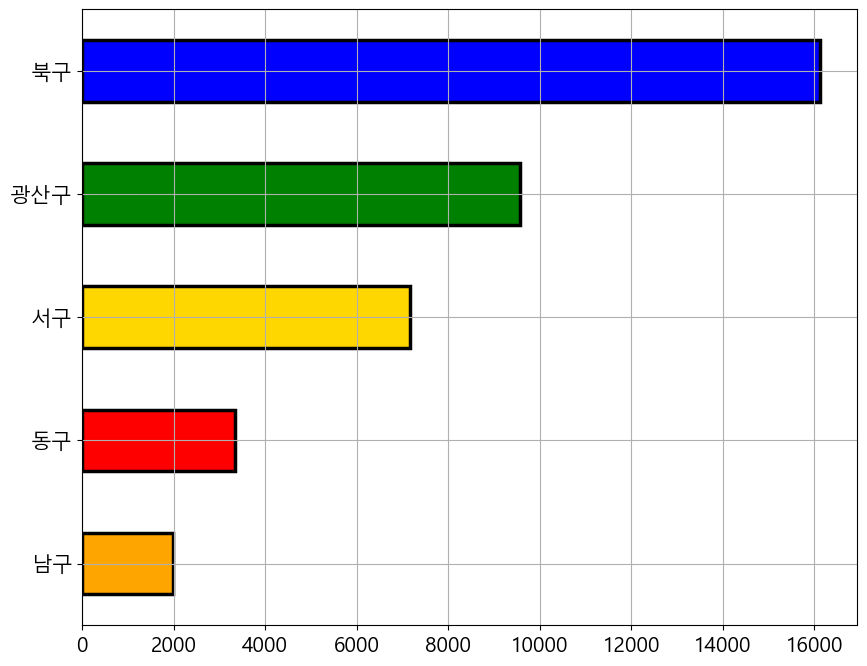

In [226]:
# 21년도 하반기 전기차 충전소 사용빈도 시각화

chargegj2102dist = pd.value_counts(chargegj2102_df['구'].values, sort=True, ascending = True)
chargegj2102dist.plot.barh()
chargegj2102dist.plot.barh(grid=True, color = ['orange', 'red', 'gold', 'green', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)

In [172]:
# 22년도 상반기 한국전력공사 전기차충전소충전량 파일 불러오기

charge2201_df = pd.read_csv('data/한국전력공사_전기차 충전소 충전량_20220330.csv', encoding = 'cp949')

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\3907313295.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  charge2201_df = pd.read_csv('data/한국전력공사_전기차 충전소 충전량_20220330.csv', encoding = 'cp949')


In [173]:
# 20년도 상반기 한국전력공사 전기차충전소충전량 퍄일에서 필요없는 ['충전기ID'] 칼럼 제거

charge2201_df.drop(columns = ['충전기ID'], inplace = True)

In [174]:
charge2201_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,울산시,울산시,국민체육센터,NaN,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51
1,울산시,울산시,국민체육센터,NaN,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43
2,경기북부,동두천,동두천지사,급속01,경기도 동두천시 평화로 2262,급속,50.0,8.83,0,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43
3,경기북부,동두천,동두천지사,급속01,경기도 동두천시 평화로 2262,급속,50.0,50.00,1,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43
4,경기북부,동두천,동두천지사,급속01,경기도 동두천시 평화로 2262,급속,50.0,0.92,0,1,2022-01-01,2022-01-01 12:33:09,2022-01-01 12:34:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,대전세종충남,세종,가재마을3단지,완속01,세종특별자치시 도움3로 159,완속,7.0,33.12,5,21,2022-03-30,2022-03-30 17:03:42,2022-03-30 22:25:05
1048571,제주,서귀포,서귀포시교육지원청,급속01,제주특별자치도 서귀포시 토평동 1442-1,급속,50.0,6.30,0,14,2022-03-30,2022-03-30 16:04:36,2022-03-30 16:19:10
1048572,강원,강원직할,강원도개발공사,급속01,강원도 춘천시 외솔길 17,급속,50.0,40.42,1,0,2022-03-30,2022-03-30 15:19:39,2022-03-30 16:19:45
1048573,대구,경산,경산우방유쉘,완속02,경상북도 경산시 옥곡동 강변서로 111,완속,7.0,11.17,1,45,2022-03-30,2022-03-30 14:37:34,2022-03-30 16:23:15


In [175]:
# 광주광역시 데이터 프레임 저장

chargegj2201_df = charge2201_df[charge2201_df['주소'].str.contains('광주광역시', na = False)]

In [176]:
chargegj2201_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,36.88,2,24,2022-01-01,2022-01-01 09:55:15,2022-01-01 12:19:53
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,7.13,1,22,2022-01-01,2022-01-01 22:21:20,2022-01-01 23:43:41
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,32.33,2,13,2022-01-01,2022-01-01 20:24:11,2022-01-01 22:37:54
90,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,6.63,0,17,2022-01-01,2022-01-01 16:28:18,2022-01-01 16:46:03
91,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,5.76,0,27,2022-01-01,2022-01-01 15:34:32,2022-01-01 16:01:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048377,광주전남,광산,도산버스차고지,급속02,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,33.30,0,30,2022-03-30,2022-03-30 09:52:22,2022-03-30 10:22:36
1048398,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,44.93,0,27,2022-03-30,2022-03-30 22:07:41,2022-03-30 22:34:53
1048422,광주전남,광산,수완골드클래스1차아파트,완속02,"광주광역시 광산구 장덕로5번길 16 (장덕동, 골드클래스)",완속,7.0,6.10,2,1,2022-03-30,2022-03-30 21:03:18,2022-03-30 23:04:30
1048484,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,69.76,0,47,2022-03-30,2022-03-30 21:44:56,2022-03-30 22:32:38


In [177]:
# '구' 칼럼 생성을 위한 주소 분리

chargegj2201_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
11,광주광역시,북구,우치로,222,"(오치동,",한국전력공사전남지사),None,None,None,None
43,광주광역시,남구,효천3로,110,"(임암동,",중흥,S-클래스,에코파크),None,None
47,광주광역시,광산구,선운로,55,"(선암동,",광주,선운지구,이지더원,3단지),None
90,광주광역시,북구,우치로,222,"(오치동,",한국전력공사전남지사),None,None,None,None
91,광주광역시,북구,우치로,222,"(오치동,",한국전력공사전남지사),None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048377,광주광역시,광산구,상무대로,63,(도산동),None,None,None,None,None
1048398,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
1048422,광주광역시,광산구,장덕로5번길,16,"(장덕동,",골드클래스),None,None,None,None
1048484,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None


In [178]:
# '구' 칼럼 생성

chargegj2201_df['구'] = chargegj2201_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_12372\1507210971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargegj2201_df['구'] = chargegj2201_df['주소'].str.split(" ",expand=True)[1]


In [179]:
chargegj2201_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,36.88,2,24,2022-01-01,2022-01-01 09:55:15,2022-01-01 12:19:53,북구
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,7.13,1,22,2022-01-01,2022-01-01 22:21:20,2022-01-01 23:43:41,남구
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,32.33,2,13,2022-01-01,2022-01-01 20:24:11,2022-01-01 22:37:54,광산구
90,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,6.63,0,17,2022-01-01,2022-01-01 16:28:18,2022-01-01 16:46:03,북구
91,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,5.76,0,27,2022-01-01,2022-01-01 15:34:32,2022-01-01 16:01:45,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048377,광주전남,광산,도산버스차고지,급속02,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,33.30,0,30,2022-03-30,2022-03-30 09:52:22,2022-03-30 10:22:36,광산구
1048398,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,44.93,0,27,2022-03-30,2022-03-30 22:07:41,2022-03-30 22:34:53,북구
1048422,광주전남,광산,수완골드클래스1차아파트,완속02,"광주광역시 광산구 장덕로5번길 16 (장덕동, 골드클래스)",완속,7.0,6.10,2,1,2022-03-30,2022-03-30 21:03:18,2022-03-30 23:04:30,광산구
1048484,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,69.76,0,47,2022-03-30,2022-03-30 21:44:56,2022-03-30 22:32:38,북구


In [180]:
# 22년도 상반기 충전소 빈도수 확인
chargercount2201_df= chargegj2201_df[['구','충전소명' ,'주소', '충전기구분']]
acounts2201 = chargercount2201_df.groupby(["구", '충전소명','주소', "충전기구분"]).size()
pd.DataFrame(acounts2201).sort_values(by = ['주소'], ascending = False)

0
구   충전소명           주소                                       충전기구분     
서구  풍암호수공원 공영주차장   광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)     급속     491
    광주시청자미디어센터     광주광역시 서구 회재로 905 (금호동, 시청자미디어센터)         급속      37
    유니버시아드힐스테이트2단지 광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지) 급속     103
    유니버시아드힐스테이트1단지 광주광역시 서구 화운로 94 (화정동, 유니버시아드 힐스테이트 1단지)  급속      12
    광천e편한세상아파트     광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)         완속     296
...                                                                ...
광산구 운남동 행정복지센터     광주광역시 광산구 목련로219번길 25 (운남동)              급속     298
    동곡동행정복지센터      광주광역시 광산구 동곡로 151-56(하산동)                급속       3
    하남3모아엘가더퍼스트    광주광역시 광산구 단전둘레길 15 (하남동, 하남3지구모아엘가더퍼스트)  완속     381
    광산문화예술회관       광주광역시 광산구 광산로 68번길 13                    급속       6
    광산구청 구청사       광주광역시 광산구 광산로 29번길 15                    급속       9

[184 rows x 1 columns]

In [181]:
# 엑셀로 저장해서 데이터 확인

In [182]:
# 중복 값 없는 데이터를 위한 사전작업 (데이터 프레임 복사)
chargegj2201_df_copy = chargegj2201_df.copy()

In [183]:
# 22년도 상반기 전기차 충전소 사용 현황 (광주 자치구 기준, 한국전력, 환경부 설치)
chargegj2201_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,36.88,2,24,2022-01-01,2022-01-01 09:55:15,2022-01-01 12:19:53,북구
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,7.13,1,22,2022-01-01,2022-01-01 22:21:20,2022-01-01 23:43:41,남구
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,32.33,2,13,2022-01-01,2022-01-01 20:24:11,2022-01-01 22:37:54,광산구
90,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,6.63,0,17,2022-01-01,2022-01-01 16:28:18,2022-01-01 16:46:03,북구
91,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,5.76,0,27,2022-01-01,2022-01-01 15:34:32,2022-01-01 16:01:45,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048377,광주전남,광산,도산버스차고지,급속02,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,33.30,0,30,2022-03-30,2022-03-30 09:52:22,2022-03-30 10:22:36,광산구
1048398,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,44.93,0,27,2022-03-30,2022-03-30 22:07:41,2022-03-30 22:34:53,북구
1048422,광주전남,광산,수완골드클래스1차아파트,완속02,"광주광역시 광산구 장덕로5번길 16 (장덕동, 골드클래스)",완속,7.0,6.10,2,1,2022-03-30,2022-03-30 21:03:18,2022-03-30 23:04:30,광산구
1048484,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,69.76,0,47,2022-03-30,2022-03-30 21:44:56,2022-03-30 22:32:38,북구


In [184]:
# 구별 데이터 프레임 확보를 위한 새로운 데이터 프레임 생성

chargegj2201_diststat_df = chargegj2201_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [185]:
chargegj2201_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,북구
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,남구
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,광산구
90,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,북구
91,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
1048377,광주전남,광산,도산버스차고지,급속02,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,광산구
1048398,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
1048422,광주전남,광산,수완골드클래스1차아파트,완속02,"광주광역시 광산구 장덕로5번길 16 (장덕동, 골드클래스)",완속,7.0,광산구
1048484,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구


In [186]:
# 중복된 데이터 제거

chargegj2201_diststat_df = chargegj2201_diststat_df.drop_duplicates()

In [187]:
chargegj2201_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,북구
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,남구
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,광산구
104,광주전남,광주전남직할,첨단2지구 호반베르디움1단지,급속01,"광주광역시 북구 첨단연신로133번길 8 (신용동, 광주첨단2지구 호반베르디움 1단지)",급속,50.0,북구
152,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
...,...,...,...,...,...,...,...,...
876867,환경부,환경부,국립광주과학관,급속01,광주광역시 북구 첨단과기로 235,급속,NaN,북구
932309,환경부,환경부,공무원교육원,급속02,광주광역시 광산구 소촌로152번길 53-27,급속,NaN,광산구
933416,환경부,환경부,블루핸즈 하남현대자동차서비스,급속01,광주광역시 광산구 하남대로 127-10,급속,NaN,광산구
989649,환경부,환경부,광주김치타운,급속01,광주광역시 남구 김치로 60,급속,NaN,남구


In [188]:
# 21년도 상반기 전기차 충전소 사용 현황(광주 자치구, 한국전력, 환경부 설치 총계)

print(chargegj2201_diststat_df['구'].value_counts())

광산구    119
북구      76
서구      60
동구      28
남구      26
Name: 구, dtype: int64


In [189]:
# 21년도 상반기 전기차 충전소 사용 현황(광주광역시 기준, 한국전력. 환경부 설치 총계)

chargegj2201_diststat_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 11          북구
43          남구
47         광산구
104         북구
152         남구
          ... 
876867      북구
932309     광산구
933416     광산구
989649      남구
1006136     서구
Name: 구, Length: 309, dtype: object>

In [190]:
# 22년도 상반기 전기차 충전소 설치 비율(광주 자치구 기준, 한국전력, 환경부 설치)

np.round(chargegj2201_diststat_df['구'].value_counts().div(309), 2)

광산구    0.39
북구     0.25
서구     0.19
동구     0.09
남구     0.08
Name: 구, dtype: float64

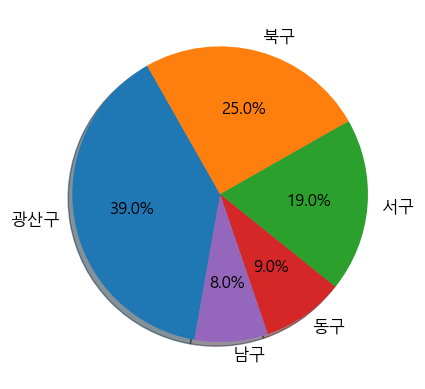

In [212]:
# 22년도 상반기 전기차 충전소 설치 비율 원형 그래프 시각화(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [39, 25, 19, 9, 8]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [192]:
chargegj2201_diststat_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
11,광주전남,광주전남직할,광주전남직할(공용),급속02,"광주광역시 북구 우치로 222 (오치동, 한국전력공사전남지사)",급속,50.0,북구
43,광주전남,서광주,효천1중흥S-클래스에코파크,완속01,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,남구
47,광주전남,광산,선운이지더원3단지,급속01,"광주광역시 광산구 선운로 55 (선암동, 광주 선운지구 이지더원 3단지)",급속,50.0,광산구
104,광주전남,광주전남직할,첨단2지구 호반베르디움1단지,급속01,"광주광역시 북구 첨단연신로133번길 8 (신용동, 광주첨단2지구 호반베르디움 1단지)",급속,50.0,북구
152,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
...,...,...,...,...,...,...,...,...
876867,환경부,환경부,국립광주과학관,급속01,광주광역시 북구 첨단과기로 235,급속,NaN,북구
932309,환경부,환경부,공무원교육원,급속02,광주광역시 광산구 소촌로152번길 53-27,급속,NaN,광산구
933416,환경부,환경부,블루핸즈 하남현대자동차서비스,급속01,광주광역시 광산구 하남대로 127-10,급속,NaN,광산구
989649,환경부,환경부,광주김치타운,급속01,광주광역시 남구 김치로 60,급속,NaN,남구


In [193]:
# 22년도 상반기 가동 충전기 현황

print(chargegj2201_diststat_df['충전기구분'].value_counts())

급속    179
완속    130
Name: 충전기구분, dtype: int64


<AxesSubplot:>

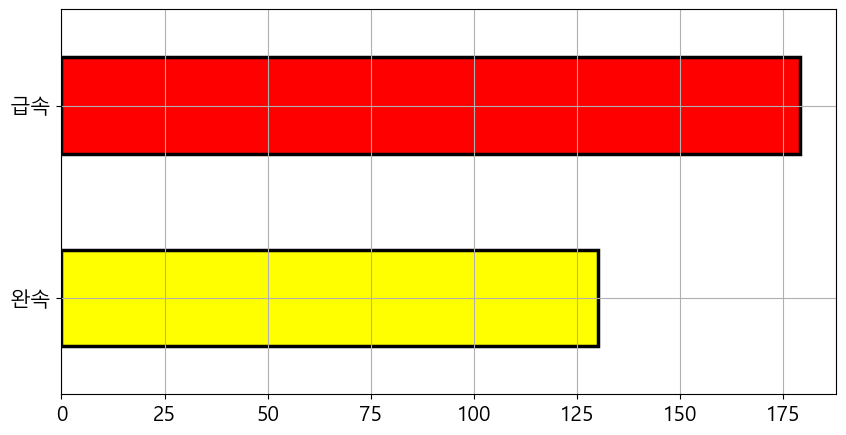

In [216]:
# 22년도 상반기 가동 충전기 현황 시각화

chargergj2201dist = pd.value_counts(chargegj2201_diststat_df['충전기구분'].values, sort=True, ascending = True)
chargergj2201dist.plot.barh()
chargergj2201dist.plot.barh(grid=True, color = ['yellow', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [195]:
charger2201_df= chargegj2201_diststat_df[['충전기구분', '구']]
acountsch2201 = charger2201_df.groupby(["충전기구분", "구"]).size()
pd.DataFrame(acountsch2201)

0
충전기구분 구      
급속    광산구  62
      남구   15
      동구   14
      북구   48
      서구   40
완속    광산구  57
      남구   11
      동구   14
      북구   28
      서구   20

In [275]:
charger2201_df= chargegj2201_diststat_df[['구', '충전기구분']]
acountsch2201d = charger2201_df.groupby(["구", "충전기구분"]).size() #, as_index= False).size()
pd.DataFrame(acountsch2201d)

0
구   충전기구분    
광산구 급속     62
    완속     57
남구  급속     15
    완속     11
동구  급속     14
    완속     14
북구  급속     48
    완속     28
서구  급속     40
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

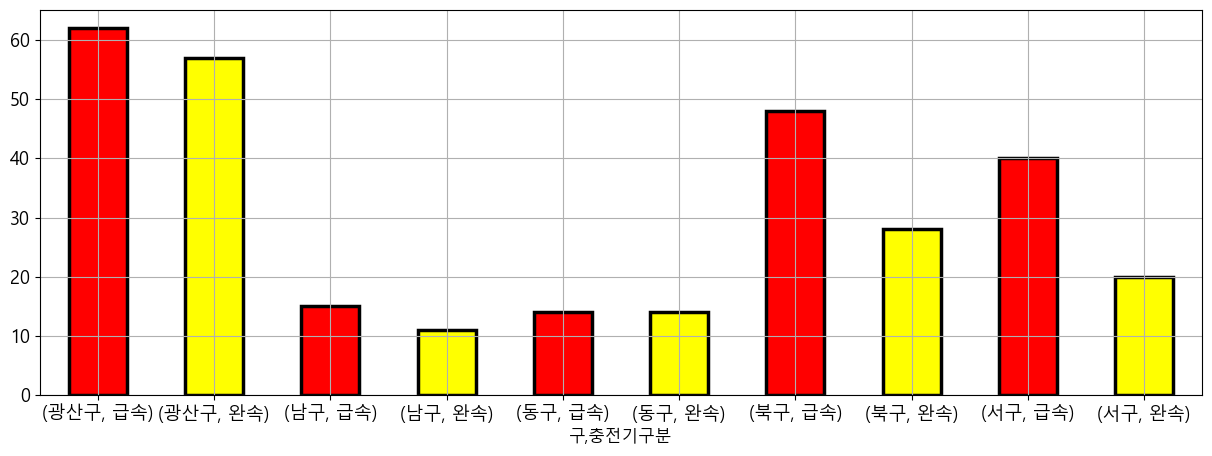

In [276]:
acountsch2201d.plot.bar()
acountsch2201d.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [198]:
chargegj2201_diststat_df['주소'].count()
chargegj2201_diststat_df['구'].count()

309

In [199]:
charger2201_df.sort_values(by = ['구','충전기구분'], ascending=True)

,구,충전기구분
47,광산구,급속
230,광산구,급속
966,광산구,급속
1242,광산구,급속
1291,광산구,급속
...,...,...
24230,서구,완속
27574,서구,완속
39069,서구,완속
83842,서구,완속


In [200]:
# 22년도 상반기 전기차 충전소 사용현황(광주 자치구 기준, 한국전력, 환경부)

print(chargegj2201_df['구'].value_counts())

북구     14688
광산구     9586
서구      6877
동구      3660
남구      1820
Name: 구, dtype: int64


<AxesSubplot:>

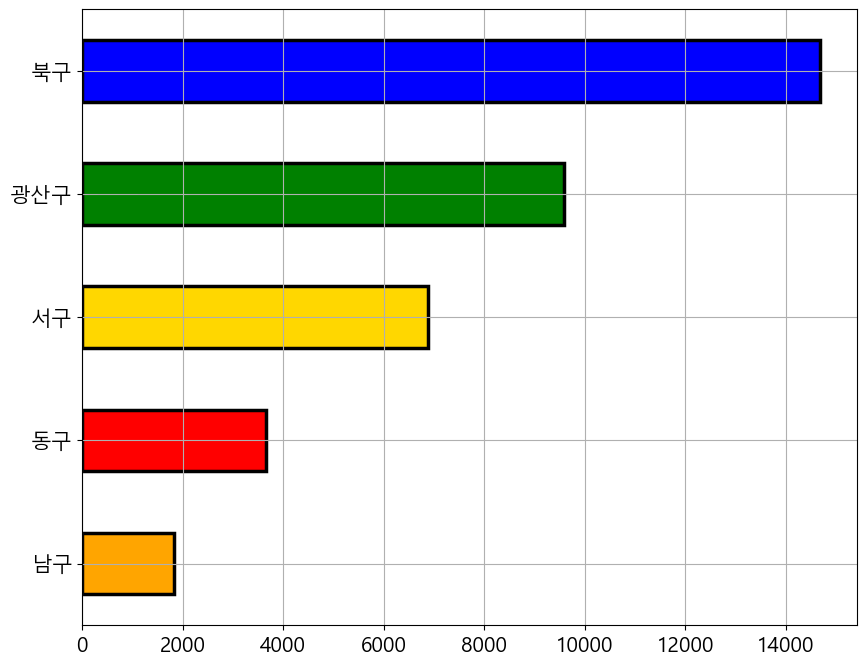

In [224]:
# 22년도 상반기 전기차 충전소 사용빈도 시각화

chargegj2201dist = pd.value_counts(chargegj2201_df['구'].values, sort=True, ascending = True)
chargegj2201dist.plot.barh()
chargegj2201dist.plot.barh(grid=True, color = ['orange', 'red', 'gold', 'green', 'blue'], edgecolor = 'black', linewidth = 2.5 figsize=(10,8), fontsize=15)